# This code will classifiy Kyphosis Disease Using Decision Trees and Random Forest Classifier 

By Marcos Valdez 

# Problem Statement

Kyphosis is an abnormally excessive convex curvature of the spine. The kyphosis data frame has 81 rows and 4 columns. 
representing data on children who have had corrective spinal surgery. Dataset contains 3 inputs and 1 output

INPUTS:

- Age: in months
- Number: the number of vertebrae involved
- Start: the number of the first (topmost) vertebra operated on.

OUTPUTS:

- Kyphosis: a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation.

- Link to the dataset: https://www.kaggle.com/abbasit/kyphosis-dataset

- Source: John M. Chambers and Trevor J. Hastie eds. (1992) Statistical Models in S, Wadsworth and Brooks/Cole, Pacific Grove, CA

# Import Libraries

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib as plt


# Import DataSet

In [3]:
kyphosis_df = pd.read_csv('kyphosis.csv')

In [4]:
kyphosis_df.head(5)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
kyphosis_df.tail(5)

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [6]:
kyphosis_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [7]:
kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


# Visualize Dataset

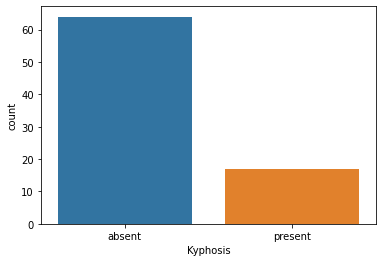

In [8]:
sns.countplot(kyphosis_df['Kyphosis'],label = 'Count')

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LabelEncoder_y = LabelEncoder()
kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(kyphosis_df['Kyphosis'])

In [10]:
kyphosis_df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [11]:
kyphosis_false = kyphosis_df[kyphosis_df['Kyphosis'] == 0] #absent

In [12]:
kyphosis_false

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
3,0,2,5,1
4,0,1,4,15
5,0,1,2,16
...,...,...,...,...
74,0,11,3,15
75,0,178,4,15
77,0,26,7,13
78,0,120,2,13


In [13]:
kyphosis_true = kyphosis_df[kyphosis_df['Kyphosis'] == 1] #still have a disease (present = 1)

In [14]:
kyphosis_true

,Kyphosis,Age,Number,Start
2,1,128,4,5
9,1,59,6,12
10,1,82,5,14
21,1,105,6,5
22,1,96,3,12
24,1,15,7,2
37,1,52,5,6
39,1,91,5,12
40,1,73,5,1
45,1,139,3,10


In [15]:
print('Disease present after operation percentage = ', (len(kyphosis_true)/len(kyphosis_df)) * 100, "%")

Disease present after operation percentage =  20.98765432098765 %


In [16]:
print('Disease not present after operation percentage (Successful Operation) = ', (len(kyphosis_false)/len(kyphosis_df)) * 100, "%")

Disease not present after operation percentage (Successful Operation) =  79.01234567901234 %


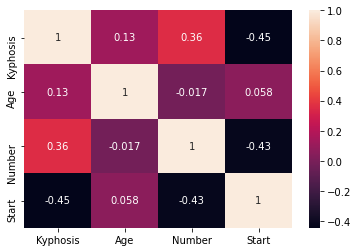

In [17]:
sns.heatmap(kyphosis_df.corr(),annot = True)

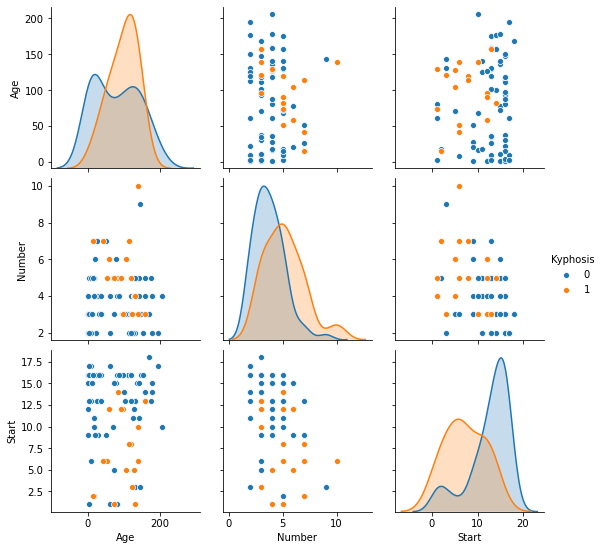

In [18]:
sns.pairplot(kyphosis_df,hue = 'Kyphosis',  vars = ['Age', 'Number', 'Start'])

# Create Testing and Training Data/Set Cleaning

In [19]:
X = kyphosis_df.drop(['Kyphosis'],axis = 1)

In [20]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [21]:
y = kyphosis_df['Kyphosis']

In [22]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int32

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

# Train the Model

In [25]:
X_train.shape

(56, 3)

In [26]:
y_train.shape

(56,)

In [27]:
X_test.shape

(25, 3)

In [28]:
y_test.shape

(25,)

In [29]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
feature_importance = pd.DataFrame(decision_tree.feature_importances_, index = X_train.columns, columns = ['importances'])

In [32]:
feature_importance

,importances
Age,0.376271
Number,0.402780
Start,0.220949


In [34]:
feature_importance = pd.DataFrame(decision_tree.feature_importances_, index = X_train.columns, columns = ['importances']).sort_values('importances', ascending = False)

In [35]:
feature_importance

,importances
Number,0.402780
Age,0.376271
Start,0.220949


# Evaluate the Model

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
y_predict_train = decision_tree.predict(X_train)

In [39]:
y_predict_train 

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

In [41]:
cm = confusion_matrix(y_train,y_predict_train) # y_train is the true values, and the predict train is the model we are creating

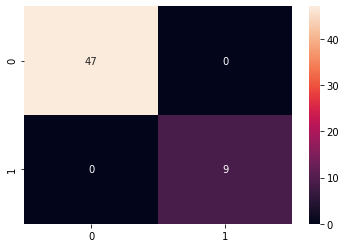

In [42]:
sns.heatmap(cm,annot = True)

In [43]:
y_predict_test = decision_tree.predict(X_test)

In [44]:
y_predict_test

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0])

In [45]:
cm = confusion_matrix(y_test, y_predict_test)

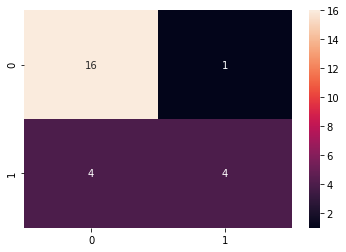

In [46]:
sns.heatmap(cm,annot = True)

In [47]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86        17
           1       0.80      0.50      0.62         8

    accuracy                           0.80        25
   macro avg       0.80      0.72      0.74        25
weighted avg       0.80      0.80      0.79        25

